<a href="https://colab.research.google.com/github/Himanshu-1703/DL_concepts/blob/main/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Functional,Model
from keras.layers import Dense,InputLayer

**The functional API is non linear patten of designing neural networks and it has the property that it can take multiple inputs and multiple outputs.**

## Single input Multi output model

In [ ]:
# define the layers of the model

input1 = keras.Input(shape=(3,))
dense1 = Dense(units=128,activation='relu')(input1)
dense2 = Dense(units=64,activation='relu')(dense1)
output1 = Dense(units=1,activation='linear')(dense2)
output2 = Dense(units=1,activation='sigmoid')(dense2)

In [ ]:
# Build the model

model1 = Functional(inputs=input1,outputs=[output1,output2])

In [ ]:
# summary of the model
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          512         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            65          ['dense_1[0][0]']                
                                                                                              

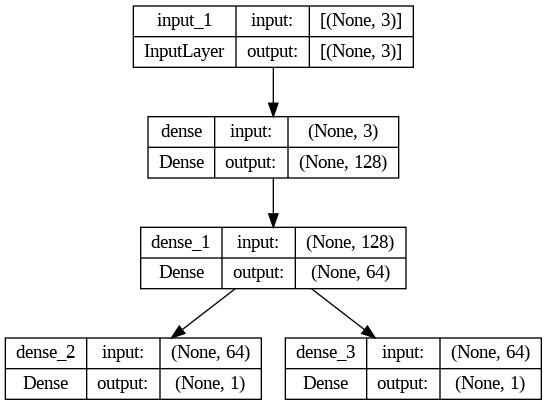

In [ ]:
# plot the model graph

from keras.utils import plot_model

plot_model(model=model1,show_shapes=True)

## Multiple input and Single output model

In [ ]:
# define input layer 1

input_a = keras.Input(shape=(4,))
a1 = Dense(units=128,activation='relu')(input_a)
a2 = Dense(units=64,activation='relu')(a1)
a3 = Dense(units=64,activation='relu')(a2)
output_a = Dense(units=1,activation='linear')(a3)

# define the input layer 2

input_b = keras.Input(shape=(10,))
b1 = Dense(units=64,activation='relu')(input_b)
b2 = Dense(units=32,activation='relu')(b1)
output_b = Dense(units=1,activation='sigmoid')(b2)

In [ ]:
# cocatenate the two outputs

from keras.layers.merging import Concatenate

concat_layer = Concatenate(axis=1)([output_a,output_b])

dense1 = Dense(units=32,activation='relu')(concat_layer)
output = Dense(units=1,activation='sigmoid')(dense1)

In [ ]:
# build the model

model2 = Functional(inputs=[input_a,input_b],outputs=output)

#summary of model
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 128)          640         ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 64)           8256        ['dense_4[0][0]']                
                                                                                            

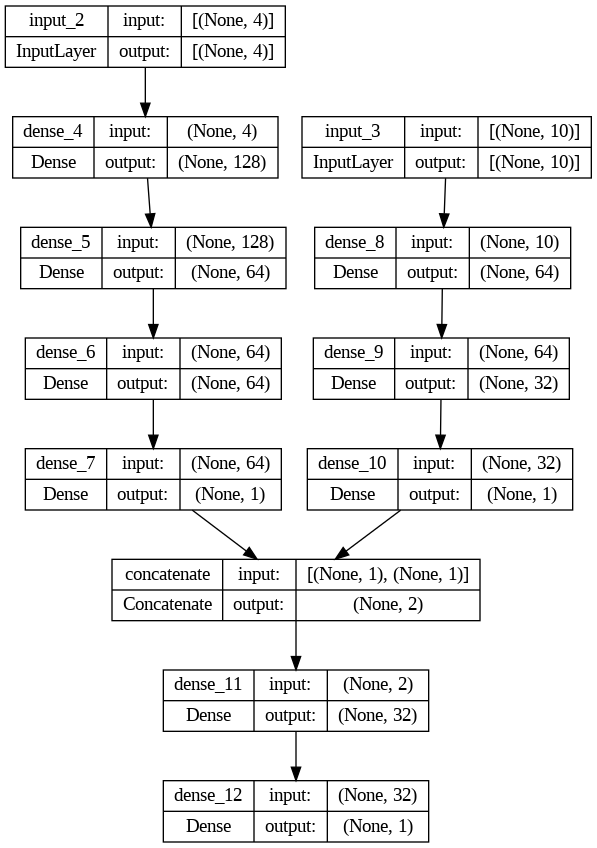

In [ ]:
# plot the model

plot_model(model=model2,show_shapes=True)